# Seminario-Taller: Procesamiento de Imágenes con Python 
Docentes: Dra. Laura M. Vargas y Dra. Valeria S. Rulloni

## Cronograma:
### Jornada 1: Python e imágenes digitales
### Jornada 2: Mejora, filtros, histograma y umbralización
### Jornada 3: Operaciones morfológicas y clasificación

# Jornada 2
## Mejora de la Imagen

* Acentuar algunas características de la imagen, por ejemplo: bordes, contraste. Este objetivo implica un grado de juicio subjetivo acerca de la calidad resultante, dependerá de la operación y la aplicación en cuestión.

* La mejora de una imagen no agrega información, la resalta, por ejemplo.

* Un método no es siempre útil para todos los problemas. 

* Los resultados podrían producir una imagen diferente a la original, se podrían sacrificar algunos aspectos para mejorar otros.

### Métodos de mejora según el dominio:
+ Existen métodos en el Dominio Espacial o en el de Frecuencia, así como en otros dominios. En este taller nos focalizaremos en el dominio espacial y en imágenes monocromáticas 2D:  

T: imagen f de entrada ------> imagen g de salida            

                      
**Mejora punto a punto (lugar a lugar/ pixel a pixel): **
    
    r=f(i,j) ------> T(r)= g(i,j)
    
            r ----->  T(r)
            
            r= nivel de gris de la imagen original y 
            T(r)= nuevo valor, nivel de gris de la imagen modificada
            
**Ejemplo: T(r)=r/2**

(354, 364) <class 'numpy.ndarray'> <class 'numpy.uint8'>


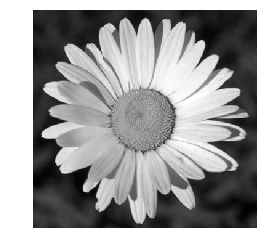

In [1]:
import PIL
from PIL import Image
path="daisy.jpg"
ima=Image.open(path) #tipo imagen
imagengris=ima.convert('L')#imagen monocroma

# get an array
import numpy as np
f = np.asarray(imagengris)#'uint8' monocroma (2D)
print(f.shape, type(f), type(f[0,0]))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(f,cmap="gray")
plt.axis('off')#para quitar la numeración de filas y columnas
plt.show()

In [2]:
#ojo con algunas asignaciones, por ejemplo en tipo listas
a=[1, 2,3, 4]
b=a ##ojo!
b[0]=2
print('a=',a,'b=',b)
c=[5,6,7]
d=c[:] # de esta forma se independiza la original
d[0]=8
print('c=',c,'d=',d)

a= [2, 2, 3, 4] b= [2, 2, 3, 4]
c= [5, 6, 7] d= [8, 6, 7]


In [3]:
#continuación
g=f/2 #T(r)=r/2
print("r=",f[0,0], type(f[0,0]))
print("T(r)=",g[0,0])
g=g.astype('uint8') #es importante convertir el tipo de dato
print("T(r)=",g[0,0])
print('máximo de f= ',f.max())
print('máximo de g= ',g.max())

r= 37 <class 'numpy.uint8'>
T(r)= 18.5
T(r)= 18
máximo de f=  254
máximo de g=  127


(-0.5, 363.5, 353.5, -0.5)

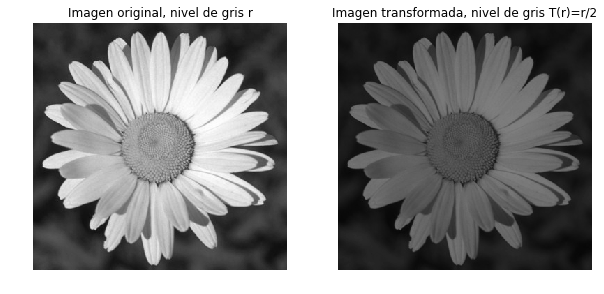

In [4]:
#continuación
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(10)
axs[0].imshow(f,cmap="gray",vmin=0, vmax=255)
axs[0].set_title("Imagen original, nivel de gris r")
axs[0].axis('off')
axs[1].imshow(g,cmap="gray",vmin=0, vmax=255)
axs[1].set_title("Imagen transformada, nivel de gris T(r)=r/2")
axs[1].axis('off')

**Ejercicio: aclarar la imagen f usando T(r)=kr o T(r)=r+k **

r=f(0,0)= 37 <class 'numpy.uint8'>
T(r)=3r=h(0,0)= 111 <class 'numpy.uint8'>
r=f(i,j)= 234
T(r)=3r=h(i,j)= 190 ???? -> es importante el tipo de dato (uint8: módulo 256)
3*243 mod 256= 190
rango de f: 13 - 254 -> uint8
rango de h:  1 - 255 -> uint8


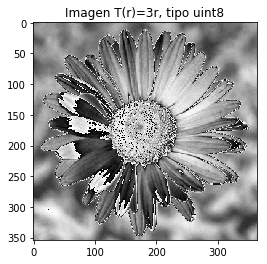

In [4]:
#continuación
h=3*f[:,:] #T(r)=3r
print("r=f(0,0)=",f[0,0], type(f[0,0]))#es importante el tipo de dato
print("T(r)=3r=h(0,0)=",h[0,0], type(h[0,0]))
print("r=f(i,j)=",f[50,170])
print("T(r)=3r=h(i,j)=",h[50,170],"???? -> es importante el tipo de dato (uint8: módulo 256)")
print('3*243 mod 256=', 3*234%256)
print("rango de f:",f.min(),"-",f.max(),"-> uint8")
print("rango de h: ",h.min(),"-",h.max(), "-> uint8")
plt.imshow(h,cmap="gray",vmin=0, vmax=255)
plt.title("Imagen T(r)=3r, tipo uint8")
plt.show()

r=f(i,j)= 234
T(r)=3r=h(i,j) 702.0 <class 'numpy.float64'>
rango de h= 39.0 - 762.0 -> flotante
702.0  módulo 256= 190.0
T(r)=3r 190 <class 'numpy.uint8'> rango= 1 - 255


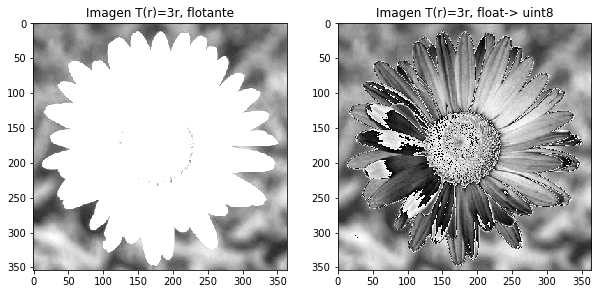

In [5]:
#continuación
h=f.astype('float')*3 #T(r)=3r
print("r=f(i,j)=",f[50,170])
print("T(r)=3r=h(i,j)",h[50,170], type(h[0,0]))
print("rango de h=",h.min(),"-",h.max(), "-> flotante")
print(h[50,170]," módulo 256=", h[50,170]-512)
h8=h.astype('uint8')
print("T(r)=3r",h8[50,170], type(h8[0,0]),"rango=",h8.min(),"-",h8.max())
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(10)
axs[0].imshow(h,cmap="gray",vmin=0, vmax=255)
axs[0].set_title("Imagen T(r)=3r, flotante")
axs[1].imshow(h8,cmap="gray",vmin=0, vmax=255)
axs[1].set_title("Imagen T(r)=3r, float-> uint8")
plt.show()

## Histograma

Además del rango de valores de gris (o intensidades) en una imagen se puede calcular su distribución utilizando el histograma.



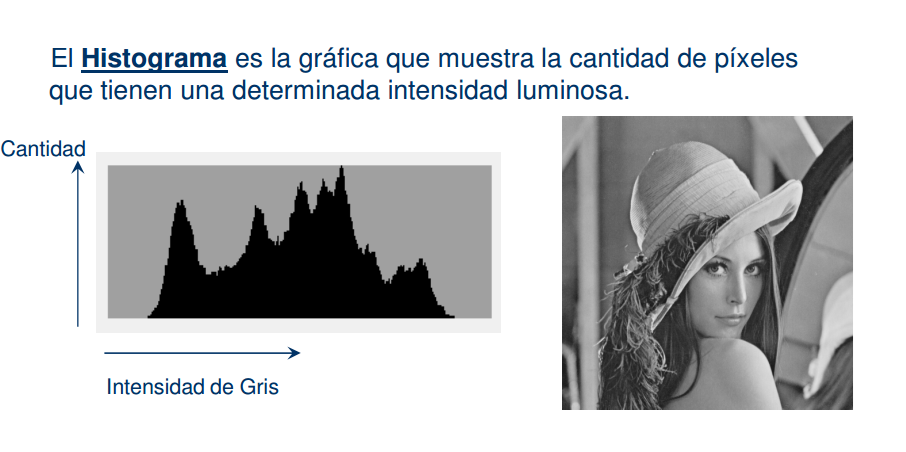

## Histogramas
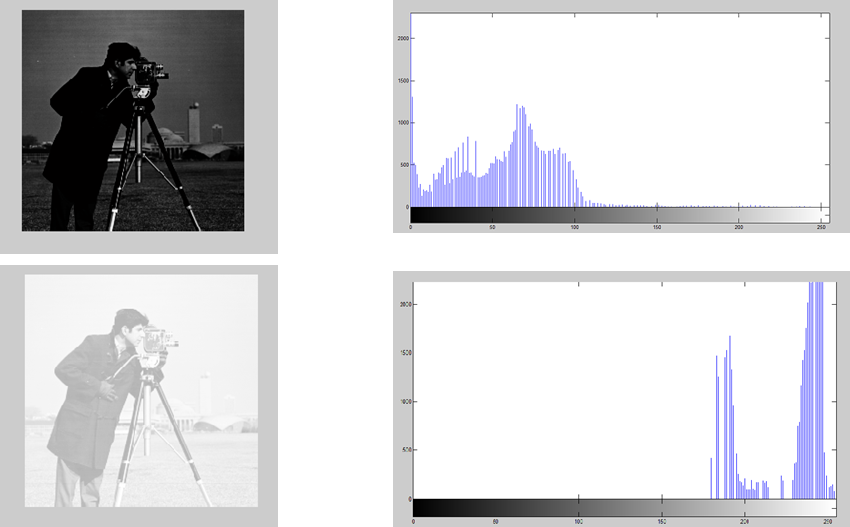

* Cuando el rango es pequeño se trata de imágenes con poco contraste.

* Cuando el rango es grande se trata de imágenes con mucho contraste.

* Cuando el histograma posee altos valores en los extremos de la escala (forma de “U”) la imagen está saturada. 

* Cuando el histograma está corrido hacia la derecha, la imagen es clara

* Cuando el histograma está corrido hacia la izquierda, la imagen es oscura


Opciones para mejorar el contraste y la visualización?
+ Modificar el rango
+ Aclarar
+ Oscurecer
+ Ecualizacion del histograma
+ etc.

## Modificar el rango
- disminuir el rango:
$$T(r)=c \log{(r+1)},\ r\geq 0$$
- llevarlo a [0 - 255]
para uint8 
$$T(r)=\left\lfloor 255\frac{r-min}{max-min} \right\rfloor, \,\, \leftarrow \, floor, redondeo$$
- llevarlo a [0 - 1]
$$T(r)=\frac{r-min}{max-min}$$


## Ajuste gamma (sin modificar el rango)
Considerando el rango de intensidades $ 0\leq r \leq 1$:

$$T(r)=r^{\gamma},$$

$\,\gamma $ parámetro (fijo y positivo) de la función

### Para Aclarar

$$T(r)=r^{\gamma},\,\gamma <1$$

Por ejemplo $T(r)=r^{\frac{1}{2}}=\sqrt{r}$

### Para Oscurecer 

$$T(r)=r^{\gamma},\,\gamma >1$$

Por ejemplo $T(r)=r^{2}$



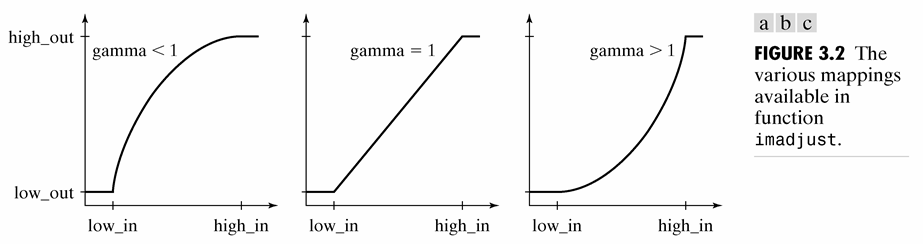

## Ecualización del histograma

- Para uint8 se calcula:
$$s=T(r)=\left\lfloor 255*\sum_{i=1}^{r}{\frac{n_i}{n}}\right\rfloor,$$

- Para llevarlo a [0 -1]:

$$s=T(r)=\sum_{i=1}^{r}{\frac{n_i}{n}},$$

en ambas ecuaciones: $n_i=\#$ pixeles con intensidad $i$ y $n=MN=\#$ de pixeles de la imagen  

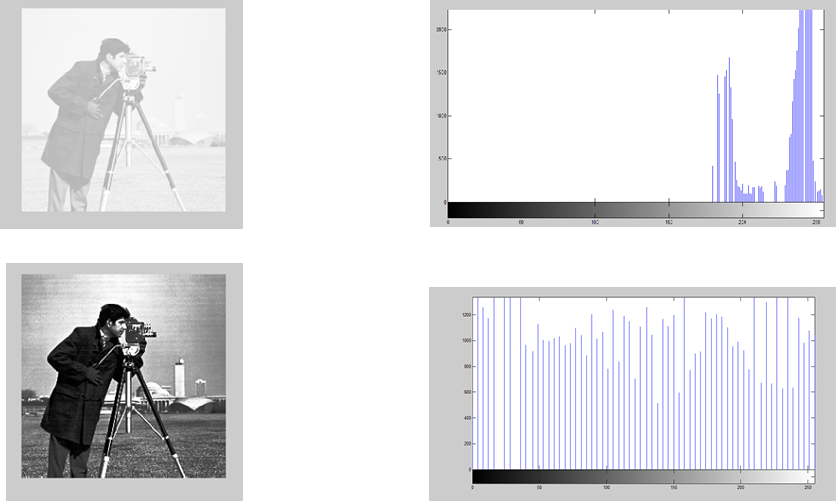


**Ejercicio: abrir la imagen 'ortopantomografia2.png', guárdela en una variable, grafique la imagen y su histograma. ¿Qué comentarios puede hacer al respecto?**

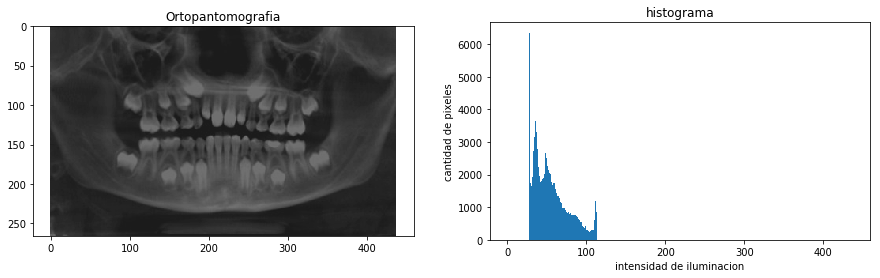

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('ortopantomografia2.png', cv2.IMREAD_GRAYSCALE)#guarda la imagen en grises (monocroma 2D)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
#axs[0].imshow(img, cmap='gray')
axs[0].set_title('Ortopantomografia')
#axs[0].set_xlim([0, 450])
axs[1].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('histograma')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')
#axs[1].set_xlim([0, 255])
plt.show()


**Visualización de la imagen y cáculo de su histograma Usando OpenCV:**

In [7]:
#continuación
cv2.imshow('Ortopanto (pulse una tecla aqui para continuar)', img)#muestra- Primer argumento: título, segundo argumento: imagen
cv2.waitKey() #espera pulsado de tecla. 
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
cv2.destroyAllWindows()


### Cálculo de una función con Ajuste gamma (para uint8)

$T(r)=r^{\gamma}$ para $0\leq r \leq 1 $ 

$T(r)=\left\lfloor 255\left(\frac{r}{255}\right)^{\gamma}\right\rfloor$ para $0\leq r \leq 255 $ (uint8) 

$\gamma $ parámetro (fijo y positivo) de la función

* Para Aclarar: $\gamma <1$ (ejemplo $T(r)=r^{\frac{1}{2}}=\sqrt{r}$)

* Para Oscurecer $\gamma >1$ (ejemplo $T(r)=r^{2}$)

In [8]:
def ajuste_gamma(imagen,gamma):
    #función que dada una imagen (arreglo de tipo uint8), y un valor positivo gamma
    #devuelve otra del mismo tipo pero con ajute gamma, si gamma>1, más oscura y si gamma <1 más clara
    imagenresultado=(imagen/255)**gamma*255
    imagenresultado=imagenresultado.astype('uint8')
    return imagenresultado

**utilizamos la función para aclarar y oscurecer la imagen:**

In [9]:
#continuación
clara=ajuste_gamma(img,0.5)
oscura=ajuste_gamma(img,2)

**visualizamos los resultados:**

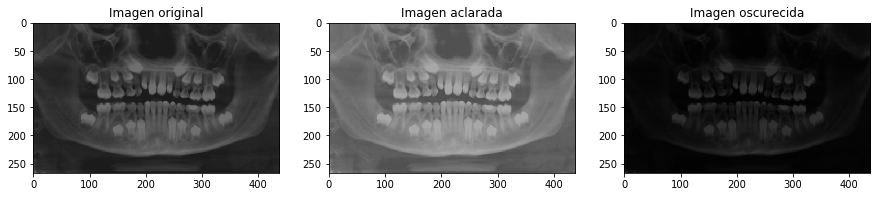

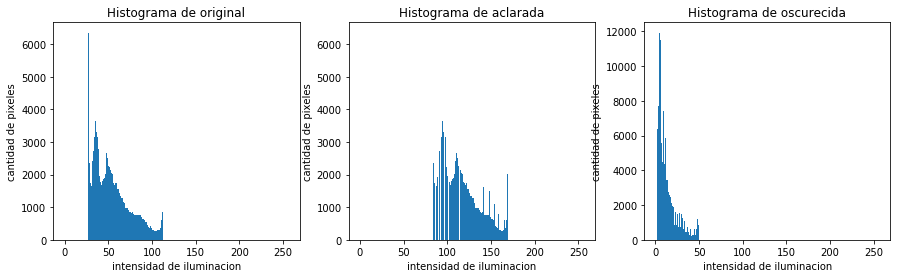

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')
axs[1].imshow(clara, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen aclarada')
axs[2].imshow(oscura, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Imagen oscurecida')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de original')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(clara[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de aclarada')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')
axs[2].hist(oscura[:,:].ravel(), 256,[0,256] ) 
axs[2].set_title('Histograma de oscurecida')
axs[2].set_xlabel('intensidad de iluminacion')
axs[2].set_ylabel('cantidad de pixeles')
plt.show()


**Ejercicio 1: Elegir una imagen de su gusto, pasarla a monocroma, aclararla u oscurecerla según su parecer y comparar los histogramas**

In [ ]:
#path= 'daisy.jpg'
#img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


### Continuamos con mejora de imagen (ejemplo: Ortopantomografía)

* Ecualización del histograma: $s=T(r)=\left\lfloor 255*\sum_{i=1}^{r}{\frac{n_i}{n}}\right\rfloor,$ para uint8  ($\left\lfloor \,\right\rfloor$ notación de piso/floor, redondeo entero)

En openCV: **cv2.equalizeHist**


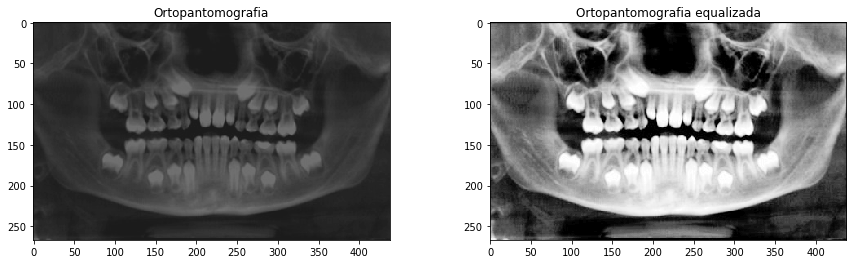

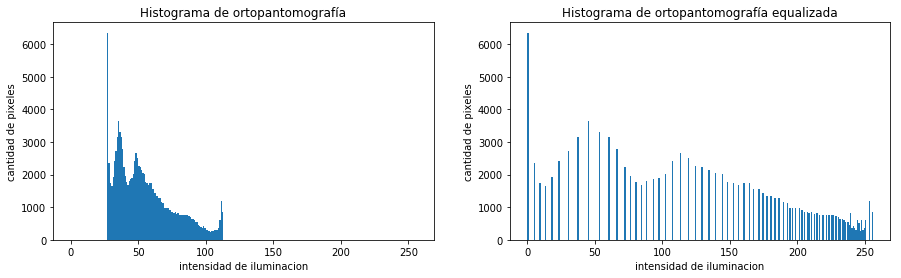

In [12]:
#continuación 
#img = cv2.imread('ortopantomografia2.png', cv2.IMREAD_GRAYSCALE)
img_equalizada = cv2.equalizeHist(img)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Ortopantomografia')
axs[1].imshow(img_equalizada, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Ortopantomografia equalizada')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de ortopantomografía')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(img_equalizada[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de ortopantomografía equalizada')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles') 
plt.show()


In [ ]:
#https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

**Ejercicio: elegir una imagen, modificarla equalizando su histograma**

## Negativo 
* $T(r)=255-r$, para unint8
* $T(r)=1-r$, para $0\leq r\leq 1$


**Imagen: Calcular el negativo de una imagen y su histograma, y a éste compararlo con el histograma. Guardar la imagen obtenida **

<class 'numpy.uint8'>


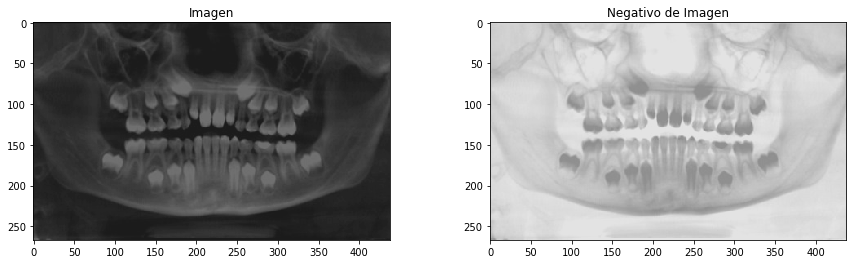

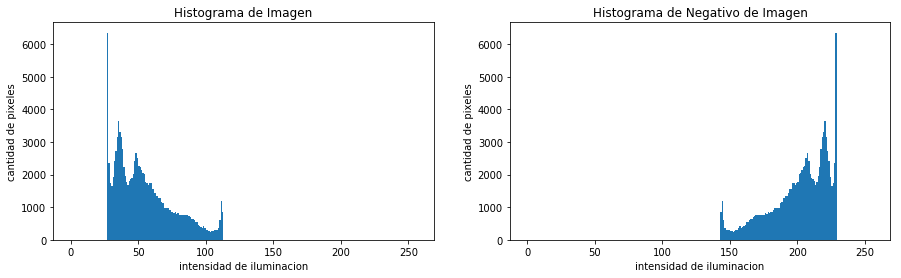

In [15]:
img_negativo=255-img
print(type(img_negativo[0,0]))
cv2.imwrite('Negativo_Ortopanto.png',img_negativo)

cv2.imshow('Imagen negativa (pulse tecla aqui)', img_negativo)
cv2.waitKey()

cv2.destroyAllWindows()

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen')
axs[1].imshow(img_negativo, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Negativo de Imagen')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de Imagen')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(img_negativo[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de Negativo de Imagen')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles') 
plt.show()

## Binarización por Umbralizado
* Primero se define un valor de corte llamado $umbral$, con algún criterio (arbitrario, 127, media, Otsu, etc.)
 $$T(r)=\left\{
\begin{array}{lr}
  1& r\geq umbral\\
	0& r<umbral\\	
\end{array}
\right.$$

*O su negativo:

$$T(r)=\left\{
\begin{array}{lr}
  0& r\geq umbral\\
	1& r<umbral\\	
\end{array}
\right.$$




* Se puede generalizar a segmentación por umbralizado (varios umbrales, por ejemplo MultiOtsu)



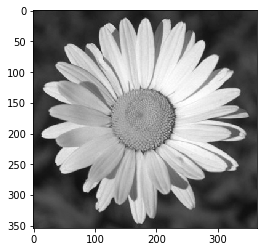

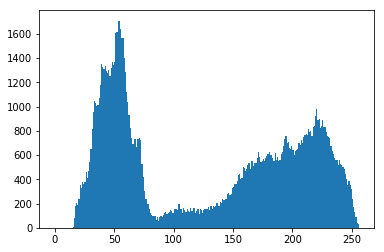

In [16]:
# https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('daisy.jpg',0)
plt.imshow(img, cmap='gray',vmin=0 ,vmax=255)
plt.show()
plt.hist(img[:,:].ravel(), 256,[0,256] ) 
plt.show()

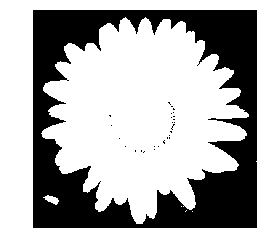

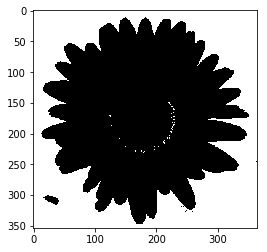

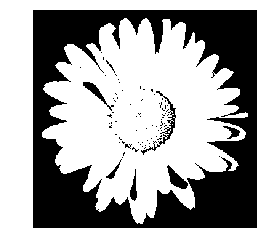

80.0 80.0 126.0


In [30]:
#continuación
umbral=80
ret1,binaria1 = cv.threshold(img,umbral,255,cv.THRESH_BINARY)
ret2,binaria2 = cv.threshold(img,umbral,255,cv.THRESH_BINARY_INV)
# Otsu's thresholding
ret3,binaria3 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(binaria1, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(binaria2, cmap='gray')
#plt.axis('off')
plt.show()
plt.imshow(binaria3, cmap='gray')
plt.axis('off')
plt.show()
print(ret1,ret2,ret3)



**Una aplicación de binarización/segmentación: tamaño (de la flor)**

In [25]:
tamano=sum(sum(binaria1))
print('la flor tiene', tamano, 'pixeles')

la flor tiene 53727 pixeles


### Binarización adaptativa (umbral local)

101.06586283185841


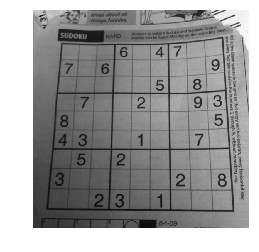

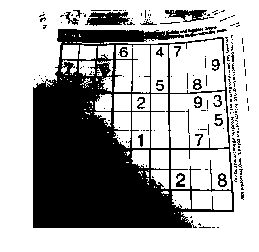

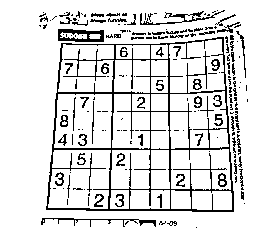

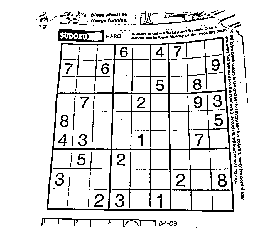

In [31]:
img = cv.imread('sudoku.png',0)
umbral=img.mean()
print(umbral)
ret4,binaria4 = cv.threshold(img,umbral,255,cv.THRESH_BINARY)
binaria5 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,21,8)
binaria6 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,21,8)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(binaria4, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(binaria5, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(binaria6, cmap='gray')
plt.axis('off')
plt.show()

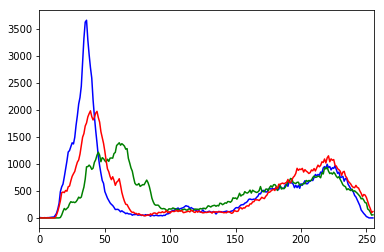

In [40]:
#Histogramas de R, G y B juntos
import cv2
import numpy as np
from matplotlib import pyplot as plt
path='daisy.jpg'
img = cv2.imread(path)
cv2.imshow(path, img)
cv2.waitKey()

color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])

plt.show()

cv2.destroyAllWindows()

In [ ]:
#https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html